<a href="https://colab.research.google.com/github/Nidzam81/ML-AI/blob/main/AI_Cipta_Malay_Song_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:

tokenizer = Tokenizer()
data = open('Lirik lagu.txt').read()

corpus = data.lower().split("\n")
print(corpus)
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


['ï»¿malam semakin kelam', 'di tambah kesepian', 'sukar untukku untuk menjemput mimpi', 'ke mana lenaku pergi', 'ku bicara sendiri', 'agar terhapus sepi', 'sejak berkurun aku menjemput rindu', 'haruskah ku menunggu', 'andai langkahmu kini terhenti', 'berpalinglah padaku di sini', 'jernihkanlah kekeruhan dulu', 'ku perlu kasihmu', 'ibarat laut yang tidak berombak', 'pasti pantai akan kesepian', 'begitulah hidupku kini', 'semenjak kau pergi', 'terusik hatiku mengenang', 'kenangan di taman cinta', 'hingga kini masih ku terasa hangatnya sentuhanmu', 'ku jadikan sejarah untuk kita kenangkan', 'di tika sepi', 'di tika rindu ', 'setiap sesuatu yang dimiliki', 'semuanya tak kekal lama di sini', 'setiap kali ku cuba menyayangi', 'terpaksa ku fikir berulang kali', 'tak rela aku bakal ditinggalkan', 'tersiksa kekecewaan', 'ku mengharungi', 'setiap liku kehidupan', 'dengan rasa waspada', 'yang ku bimbangi', 'diriku tergelinciran', 'dan menyesal seusia', 'andai kau fahami', 'sabar menanti', 'kan ku

In [3]:
import json
with open('word_index.json','w') as fp:
    json.dump(tokenizer.word_index,fp)

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[1083, 184], [1083, 184, 474], [3, 1084], [3, 1084, 165], [475, 476], [475, 476, 17], [475, 476, 17, 477], [475, 476, 17, 477, 50], [31, 32], [31, 32, 1085], [31, 32, 1085, 45], [1, 108], [1, 108, 51], [98, 676], [98, 676, 76], [367, 478], [367, 478, 4], [367, 478, 4, 477], [367, 478, 4, 477, 15], [282, 1], [282, 1, 99], [89, 1086], [89, 1086, 22], [89, 1086, 22, 185], [1087, 283], [1087, 283, 3], [1087, 283, 3, 77], [1088, 677], [1088, 677, 78], [1, 479], [1, 479, 284], [678, 480], [678, 480, 2], [678, 480, 2, 34], [678, 480, 2, 34, 1089], [79, 186], [79, 186, 27], [79, 186, 27, 165], [679, 140], [679, 140, 22], [680, 5], [680, 5, 45], [1090, 23], [1090, 23, 1091], [62, 3], [62, 3, 187], [62, 3, 187, 6], [90, 22], [90, 22, 25], [90, 22, 25, 1], [90, 22, 25, 1, 81], [90, 22, 25, 1, 81, 1092], [90, 22, 25, 1, 81, 1092, 1093], [1, 681], [1, 681, 285], [1, 681, 285, 17], [1, 681, 285, 17, 7], [1, 681, 285, 17, 7, 682], [3, 240], [3, 240, 76], [3, 240], [3, 240, 15], [100, 209], [100, 209

In [5]:
print(tokenizer.word_index)

{'ku': 1, 'yang': 2, 'di': 3, 'aku': 4, 'kau': 5, 'cinta': 6, 'kita': 7, 'ini': 8, 'tak': 9, 'dan': 10, 'dalam': 11, 'sayang': 12, 'hanya': 13, 'oh': 14, 'rindu': 15, 'hati': 16, 'untuk': 17, 'kasih': 18, 'tiada': 19, 'kan': 20, 'ada': 21, 'kini': 22, 'hatiku': 23, 'engkau': 24, 'masih': 25, 'apa': 26, 'akan': 27, 'rasa': 28, 'kata': 29, 'bersama': 30, 'ke': 31, 'mana': 32, 'semua': 33, 'tidak': 34, 'telah': 35, 'bila': 36, 'dengan': 37, 'menjadi': 38, 'walau': 39, 'mu': 40, 'lagi': 41, 'hari': 42, 'satu': 43, 'tapi': 44, 'pergi': 45, 'biar': 46, 'tahu': 47, 'kembali': 48, 'tetap': 49, 'mimpi': 50, 'sendiri': 51, 'namun': 52, 'kekasih': 53, 'cintaku': 54, 'masa': 55, 'bunga': 56, 'diri': 57, 'pada': 58, 'mungkin': 59, 'itu': 60, 'dia': 61, 'kenangan': 62, 'lama': 63, 'menanti': 64, 'dirimu': 65, 'ia': 66, 'tanpa': 67, 'tanya': 68, 'malam': 69, 'kerana': 70, 'mata': 71, 'hatimu': 72, 'tuhan': 73, 'khabar': 74, 'saat': 75, 'sepi': 76, 'sini': 77, 'dulu': 78, 'pasti': 79, 'suci': 80, 'ter

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=200, verbose=1)
#print model.summary()
print(model)
model.save("1-Layer-Bidirectional-LTSM.h5")

Epoch 1/200
216/216 [==============================] - 13s 37ms/step - loss: 7.0718 - accuracy: 0.0212
Epoch 2/200
216/216 [==============================] - 7s 34ms/step - loss: 5.9691 - accuracy: 0.0640
Epoch 3/200
216/216 [==============================] - 7s 33ms/step - loss: 4.5311 - accuracy: 0.1803
Epoch 4/200
216/216 [==============================] - 8s 39ms/step - loss: 3.1307 - accuracy: 0.3553
Epoch 5/200
216/216 [==============================] - 8s 39ms/step - loss: 2.1412 - accuracy: 0.5249
Epoch 6/200
216/216 [==============================] - 10s 44ms/step - loss: 1.5688 - accuracy: 0.6448
Epoch 7/200
216/216 [==============================] - 9s 40ms/step - loss: 1.2162 - accuracy: 0.7179
Epoch 8/200
216/216 [==============================] - 9s 40ms/step - loss: 1.0792 - accuracy: 0.7313- ETA: 0s - loss:
Epoch 9/200
216/216 [==============================] - 8s 36ms/step - loss: 0.9981 - accuracy: 0.7429
Epoch 10/200
216/216 [==============================] - 8s 36ms

216/216 [==============================] - 8s 37ms/step - loss: 1.2667 - accuracy: 0.6540
Epoch 79/200
216/216 [==============================] - 8s 36ms/step - loss: 1.4790 - accuracy: 0.6117
Epoch 80/200
216/216 [==============================] - 8s 35ms/step - loss: 1.1072 - accuracy: 0.6908
Epoch 81/200
216/216 [==============================] - 8s 37ms/step - loss: 0.9046 - accuracy: 0.7356
Epoch 82/200
216/216 [==============================] - 8s 36ms/step - loss: 0.8161 - accuracy: 0.7572
Epoch 83/200
216/216 [==============================] - 8s 36ms/step - loss: 0.7559 - accuracy: 0.7673
Epoch 84/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7555 - accuracy: 0.7611 0s - loss: 0.7552 - accuracy: 0.76
Epoch 85/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7553 - accuracy: 0.7567
Epoch 86/200
216/216 [==============================] - 8s 36ms/step - loss: 0.7546 - accuracy: 0.7520
Epoch 87/200
216/216 [=============================

216/216 [==============================] - 8s 35ms/step - loss: 0.7416 - accuracy: 0.7552
Epoch 153/200
216/216 [==============================] - 7s 35ms/step - loss: 0.7268 - accuracy: 0.7602
Epoch 154/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7725 - accuracy: 0.7496
Epoch 155/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7220 - accuracy: 0.7613 0s - loss: 0.7193 - accuracy
Epoch 156/200
216/216 [==============================] - 8s 36ms/step - loss: 0.7373 - accuracy: 0.7561
Epoch 157/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7479 - accuracy: 0.7537
Epoch 158/200
216/216 [==============================] - 8s 36ms/step - loss: 0.7331 - accuracy: 0.7586- ETA: 
Epoch 159/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7242 - accuracy: 0.7614
Epoch 160/200
216/216 [==============================] - 8s 35ms/step - loss: 0.7215 - accuracy: 0.7585 0s - l
Epoch 161/200
216/216 [============

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

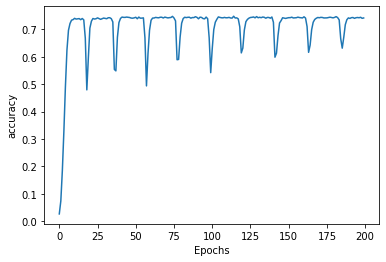

In [9]:
plot_graphs(history, 'accuracy')


In [10]:
seed_text = "kehilangan mu"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

[1617, 40]


c:\users\user-pc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1617, 40, 55]
[1617, 40, 55, 97]
[1617, 40, 55, 97, 12]
[1617, 40, 55, 97, 12, 530]
[1617, 40, 55, 97, 12, 530, 7]
[1617, 40, 55, 97, 12, 530, 7, 20]
[1617, 40, 55, 97, 12, 530, 7, 20, 1]
[1617, 40, 55, 97, 12, 530, 7, 20, 1, 1243]
[1617, 40, 55, 97, 12, 530, 7, 20, 1, 1243, 1]
kehilangan mu masa pun sayang ya kita kan ku senang ku esa
